In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

plt.style.use('ggplot')

C:\Users\Noaja\Downloads\msci_project\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
load_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\processed"

event_X_train = pd.read_pickle(os.path.join(load_path, "event_X_train.pkl"))
event_X_test = pd.read_pickle(os.path.join(load_path, "event_X_test.pkl"))

y_train = pd.read_pickle(os.path.join(load_path, "y_train.pkl"))
y_test = pd.read_pickle(os.path.join(load_path, "y_test.pkl"))

In [3]:
scale_factor = (y_train == 0).sum() / (y_train == 1).sum()

In [5]:
# XGBoost Classifier
bdt = xgb.XGBClassifier(n_estimators=4000,
        learning_rate=0.15, 
        nthread=-1,
        random_state=1,
        max_depth=10,
        alpha=5,
        colsample_bytree=0.7,
        reg_lambda=0.23,
        min_child_weight=4,
        subsample=1,
        scale_pos_weight=scale_factor)

history = bdt.fit(event_X_train, y_train,
        early_stopping_rounds=20,
        eval_set=[(event_X_test, y_test)],
        verbose=True,)

C:\Users\Noaja\Downloads\msci_project\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Noaja\Downloads\msci_project\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65479
[1]	validation_0-logloss:0.62519
[2]	validation_0-logloss:0.60305
[3]	validation_0-logloss:0.58555
[4]	validation_0-logloss:0.57174
[5]	validation_0-logloss:0.56087
[6]	validation_0-logloss:0.55281
[7]	validation_0-logloss:0.54633
[8]	validation_0-logloss:0.54050
[9]	validation_0-logloss:0.53574
[10]	validation_0-logloss:0.53202
[11]	validation_0-logloss:0.52912
[12]	validation_0-logloss:0.52667
[13]	validation_0-logloss:0.52498
[14]	validation_0-logloss:0.52330
[15]	validation_0-logloss:0.52178
[16]	validation_0-logloss:0.52062
[17]	validation_0-logloss:0.51952
[18]	validation_0-logloss:0.51864
[19]	validation_0-logloss:0.51771
[20]	validation_0-lo

In [ ]:
save_path = r'C:\Users\Noaja\Downloads\msci_project\tth-ML-project\models\xgboost_model.model'
bdt.save_model(save_path)

In [ ]:
bdt = xgb.Booster({'nthread': 4})  # init model
bdt.load_model(save_path)  # load data

No handles with labels found to put in legend.


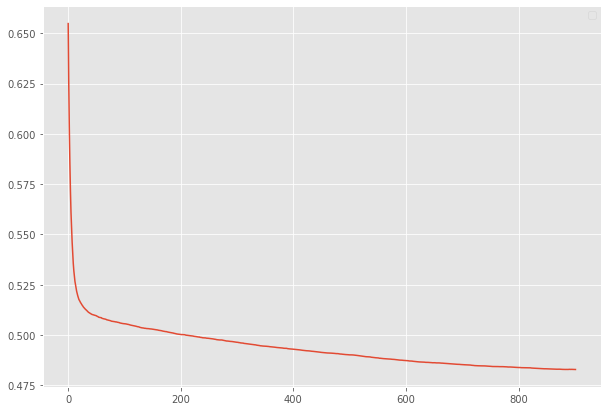

In [6]:
results = bdt.evals_result()

fig = plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['logloss'])
plt.legend()
plt.show()